#Count Data and Ordinal Data with the Gamma-Poisson Distribution

Typically, we model count data, or integer valued data, with the gamma-Poisson distribution

Recall that the Poisson distribution is a distribution over integer values parameterized by $\lambda$. One interpretation behind $\lambda$ is that it parameterizes the rate at which events occur with a fixed interval, assuming these events occur independently.  The gamma distribution is conjugate to the Poisson distribution, so the gamma-Poisson distribution allows us to learn both the distribution over counts and the rate parameter $\lambda$.

Let's set up our environment and consider some examples of count data

In [127]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context('talk')
import csv
import urllib2
import StringIO

%matplotlib inline

[Children Ever Born](http://data.princeton.edu/wws509/datasets/#ceb) is a dataset of birthrates in Fiji from the *World Fertility Survey* with the following columns:


- `dur`: marriage duration
- `res`: residence,
- `educ`: level of education,
- `mean`: mean number of born,
- `var`: variance of children born
- `y`: number of women

Ordinal columns `dur`, `res`, and `educ` are shown as text in the following dataset 

In [53]:
ceb = pd.read_csv('http://data.princeton.edu/wws509/datasets/ceb.dat', sep='\s+')
ceb.head()

,dur,res,educ,mean,var,n,y
1,0-4,Suva,none,0.50,1.14,8,4.00
2,0-4,Suva,lower,1.14,0.73,21,23.94
3,0-4,Suva,upper,0.90,0.67,42,37.80
4,0-4,Suva,sec+,0.73,0.48,51,37.23
5,0-4,urban,none,1.17,1.06,12,14.04


With the these columns encoded, we can now represent them as integers

`dur` and `educ` are ordinal columns.  Additionally, number of women, `n`, is integer valued.

In [102]:
ceb_int = pd.read_csv('http://data.princeton.edu/wws509/datasets/ceb.raw', sep='\s+', names = ['index'] + list(ceb.columns[:-1]), index_col=0)
ceb_int.head()

,dur,res,educ,mean,var,n
index,,,,,,
1,1,1,1,0.50,1.14,8
2,1,1,2,1.14,0.73,21
3,1,1,3,0.90,0.67,42
4,1,1,4,0.73,0.48,51
5,1,2,1,1.17,1.06,12


We can map these orderings of `dur` and `educ` to produce a crosstab heatmap of `n`, numbe of women

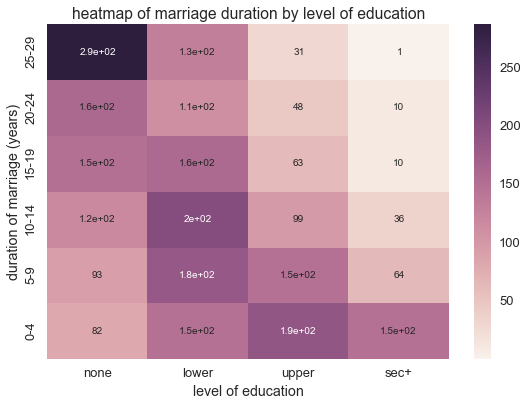

In [101]:
plt.figure(figsize=(9,6))
ct = pd.crosstab(ceb_int['dur'], ceb_int['educ'], values=ceb_int['n'], aggfunc= np.sum).sort_index(ascending = False)
sns.heatmap(ct, annot = True)
plt.yticks(ceb_int['dur'].drop_duplicates().values - .5, ceb['dur'].drop_duplicates().values)
plt.xticks(ceb_int['educ'].drop_duplicates().values - .5, ceb['educ'].drop_duplicates().values)
plt.ylabel('duration of marriage (years)')
plt.xlabel('level of education')
plt.title('heatmap of marriage duration by level of education')

Since `dur` and `education` are ordinal valued, the columns assume a small number of integer values

Additionally, the [caffeine dataset](http://stanford.edu/class/psych252/data/index.html) below measures caffeine intake and performance on a 10 question quiz.  The variables are:

- `coffee`: coffee intake (1 = 0 cups, 2 = 2 cups, 3 = 4 cups)
- `perf`: quiz score
- `numprob`: problems attempted
- `accur`: accuracy

In [131]:
response = urllib2.urlopen('http://stanford.edu/class/psych252/_downloads/caffeine.csv')
html = response.read()
caf = pd.read_csv(StringIO.StringIO(html[:-16]))
caf.head()

,coffee,perf,accur,numprob
0,1,53,0.449877,7
1,1,9,0.499534,6
2,1,31,0.498590,6
3,1,38,0.454312,7
4,2,40,0.421212,8


Based on the characteristics of each column, `coffee` and `numprob` easily fit into the category of count data appropriate to a gamma-Poisson distribution

In [130]:
caf.describe()

,coffee,perf,accur,numprob
count,60.000000,60.000000,60.000000,60.000000
mean,2.000000,42.366667,0.510854,7.950000
std,0.823387,18.350603,0.107704,1.185005
min,1.000000,5.000000,0.240238,6.000000
25%,1.000000,31.000000,0.425859,7.000000
50%,2.000000,40.000000,0.509806,8.000000
75%,3.000000,53.500000,0.594445,9.000000
max,3.000000,89.000000,0.748692,10.000000


Note that while integer valued data with high values is sometimes modeled with a gamma-Poisson ditribution, remember that the gamma-Poisson distribution has equal mean and variance $\lambda$:

$$E(X) = Var(X) = \lambda$$

If you want to be more flexible with this assumption, you may want to consider using a normal inverse-chisquare or a normal inverse-Wishart distribution depending on your data

To import the gamma-poisson likelihood, call:

In [134]:
from microscopes.models import gp as gamma_poisson